# colors

In [1]:
# -----------------------------------------------------------------------------
# Matplotlib cheat book
# Released under the BSD License
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

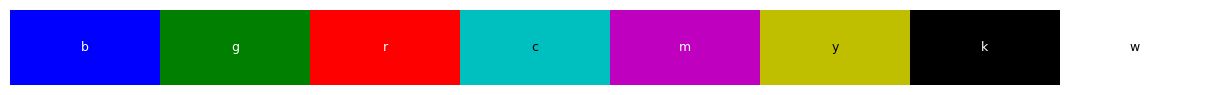

In [2]:
figsize = 12.0, 0.75
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ymin, ymax=  0, 1
xmin, xmax = 0, figsize[0]/figsize[1]
ax.set_xlim(xmin, xmax), ax.set_xticks([])
ax.set_ylim(ymin, ymax), ax.set_yticks([])

# Uniform colormaps
# -----------------------------------------------------------------------------
palettes = {
    'raw' : ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'],
    'rgba' : [(1, 0, 0), (1, 0, 0, 0.75), (1, 0, 0, 0.50), (1, 0, 0, 0.25)],
    'HexRGBA' : ["#FF0000", "#FF0000BB", "#FF000088", "#FF000044"],
    'cycle' : ["C%d" % i for i in range(10)],
    'grey' : ["%1.1f" % (i/10) for i in range(11)],
    'name' : ["DarkRed", "Firebrick", "Crimson", "IndianRed", "Salmon" ] }

for name, colors in palettes.items():
    C = mpl.colors.to_rgba_array(colors).reshape((1, len(colors), 4))
    ax.imshow(C, extent=[xmin, xmax, ymin, ymax])

    # Drop alpha by assuming we're on a white background PDF.
    alpha = C[0, :, 3]
    rgb = C[0, :, :3] * alpha[:, np.newaxis] + (1 - alpha[:, np.newaxis])
    # Same calculation for luminance as
    # https://matplotlib.org/stable/users/explain/colors/colors.html#comparison-between-x11-css4-and-xkcd-colors
    luma = 0.299 * rgb[:, 0] + 0.587 * rgb[:, 1] + 0.114 * rgb[:, 2]

    dx = (xmax-xmin)/len(colors)
    for i in range(len(colors)):
        text_color = "black" if luma[i] > 0.5 else "white"
        text = str(colors[i]).replace(' ', '')
        ax.text((i+0.5)*dx, (ymin+ymax)/2, text, color=text_color, zorder=10,
                family="DejaVu Sans", size=9, ha="center", va="center")

    # fig.savefig(ROOT_DIR / f"figures/colors-{name}.pdf")
    plt.show()
    ax.clear()